In [15]:
import json
import pandas as pd
import glob as globby
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [96]:
dfs = []
patterns = ['d1', 'd2', 'd3']

for pattern in patterns:
    glob = globby.glob(f'./results/*{pattern}*.json')
    tmp_dfs = []
    for fname in glob:

        results = []
        with open(fname, 'r') as j:
            data = json.load(j)
            ft_mean = data['fit_time_mean']
            ft_stdd = data['fit_time_std_dev']
            f1_m_mean = data['f1_macro_mean']
            f1_m_stdd = data['f1_macro_std_dev']
            f1_w_mean = data['f1_weighted_mean']
            f1_w_stdd = data['f1_weighted_std_dev']
            param_sets = data['params']
            param_keys = [k if isinstance(k, list) or '__' not in k else k.split('__')[1] for k in param_sets[0].keys()]
            keys = list(data.keys())
            keys.remove('params')
            keys += param_keys

            for i in range(len(param_sets)):
                params = param_sets[i]
                tmp = []
                for k, v in params.items():
                    if k == "vectorizer":
                        v = 'CountVectorizer' if 'Count' in v else 'TfidfVectorizer'
                    elif 'preprocessor' in k:
                        v = None if v == None else 'SnowBallStemmer'
                    elif k == 'classifier':
                        v = 'CatBoost' if 'CatB' in v else 'XGB'

                    tmp.append(v)

                results.append([ft_mean[i], ft_stdd[i], f1_m_mean[i], f1_m_stdd[i], f1_w_mean[i], f1_w_stdd[i], *tmp])

            df = pd.DataFrame(results, columns=keys)
            tmp_dfs.append(df)

    dfs.append(pd.concat(tmp_dfs))
            

results_df = pd.concat(dfs, keys=patterns, names=['Dataset', 'Row Index'])
results_df.to_csv('./results/results.csv')

In [16]:
results_df = pd.read_csv('./results/results.csv')
results_df.head()

,Dataset,Row Index,fit_time_mean,fit_time_std_dev,f1_macro_mean,f1_macro_std_dev,f1_weighted_mean,f1_weighted_std_dev,vectorizer,ngram_range,preprocessor,max_df,learning_rate,n_estimators,rsm,depth,classifier,colsample_bytree,max_depth
0,d1,0,33.039909,0.239574,0.670264,0.005717,0.780033,0.005102,CountVectorizer,"[1, 1]",SnowBallStemmer,0.5,0.001,1000,0.75,6.0,CatBoost,NaN,NaN
1,d1,1,76.083909,2.009365,0.699475,0.005822,0.805844,0.005017,CountVectorizer,"[1, 1]",SnowBallStemmer,0.5,0.001,1000,0.75,10.0,CatBoost,NaN,NaN
2,d1,2,34.256089,0.525754,0.669775,0.005555,0.779649,0.004888,CountVectorizer,"[1, 1]",SnowBallStemmer,0.5,0.001,1000,1.00,6.0,CatBoost,NaN,NaN
3,d1,3,76.339928,0.614558,0.699290,0.005362,0.805734,0.004548,CountVectorizer,"[1, 1]",SnowBallStemmer,0.5,0.001,1000,1.00,10.0,CatBoost,NaN,NaN
4,d1,4,8.599488,1.542995,0.724271,0.004741,0.827722,0.003845,CountVectorizer,"[1, 1]",SnowBallStemmer,0.5,0.100,1000,0.75,6.0,CatBoost,NaN,NaN


In [47]:
all_s_mcr = results_df.sort_values(by='f1_macro_mean', ascending=False)
all_s_ftm = results_df.sort_values(by='fit_time_mean', ascending=True)

In [17]:
d1_df = results_df[results_df["Dataset"] == "d1"]
d2_df = results_df[results_df["Dataset"] == "d2"]
d3_df = results_df[results_df["Dataset"] == "d3"]

In [18]:
print(f"{d1_df['classifier'].value_counts()}")
print(f"{d2_df['classifier'].value_counts()}")
print(f"{d3_df['classifier'].value_counts()}")

classifier
CatBoost    128
XGB         127
Name: count, dtype: int64
classifier
CatBoost    128
XGB         128
Name: count, dtype: int64
classifier
CatBoost    128
XGB         128
Name: count, dtype: int64


In [25]:
d1_s_mcr = d1_df.sort_values(by='f1_macro_mean', ascending=False)
d1_s_mcr.head()


,Dataset,Row Index,fit_time_mean,fit_time_std_dev,f1_macro_mean,f1_macro_std_dev,f1_weighted_mean,f1_weighted_std_dev,vectorizer,ngram_range,preprocessor,max_df,learning_rate,n_estimators,rsm,depth,classifier,colsample_bytree,max_depth
175,d1,47,15035.262271,1042.335020,0.736519,0.002982,0.842681,0.002395,CountVectorizer,"[1, 3]",SnowBallStemmer,0.9,0.1,500,NaN,NaN,XGB,0.9,12.0
167,d1,39,15067.709278,1019.599637,0.736519,0.002982,0.842681,0.002395,CountVectorizer,"[1, 3]",SnowBallStemmer,0.5,0.1,500,NaN,NaN,XGB,0.9,12.0
149,d1,21,1028.130420,108.701274,0.736187,0.005404,0.840596,0.004136,CountVectorizer,"[1, 1]",NaN,0.5,0.1,500,NaN,NaN,XGB,0.5,12.0
157,d1,29,1027.678782,109.032802,0.736187,0.005404,0.840596,0.004136,CountVectorizer,"[1, 1]",NaN,0.9,0.1,500,NaN,NaN,XGB,0.5,12.0
133,d1,5,844.350579,62.226813,0.735932,0.005192,0.842184,0.003438,CountVectorizer,"[1, 1]",SnowBallStemmer,0.5,0.1,500,NaN,NaN,XGB,0.5,12.0


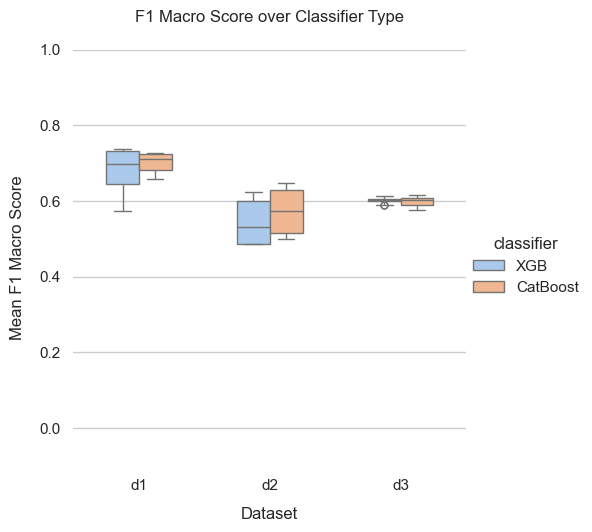

In [64]:
sns.set_theme(style="ticks", palette="pastel")
sns.set_style('whitegrid')

ax = sns.catplot(data=all_s_mcr, x='Dataset', y='f1_macro_mean', kind='box', hue="classifier", width=0.5);

ax.set(ylim=(-0.1, 1.0))
sns.despine(offset=0, bottom=True, left=True)

plt.title("F1 Macro Score over Classifier Type", pad=20)
plt.xlabel("Dataset", labelpad=10)
plt.ylabel("Mean F1 Macro Score", labelpad=10);

In [59]:
all_s_ftm['fit_time_mean'] = all_s_ftm['fit_time_mean'].apply(lambda time: float(time) / 60.0)

Text(0.5, 1.0, 'Fit Time over Classifier Type')

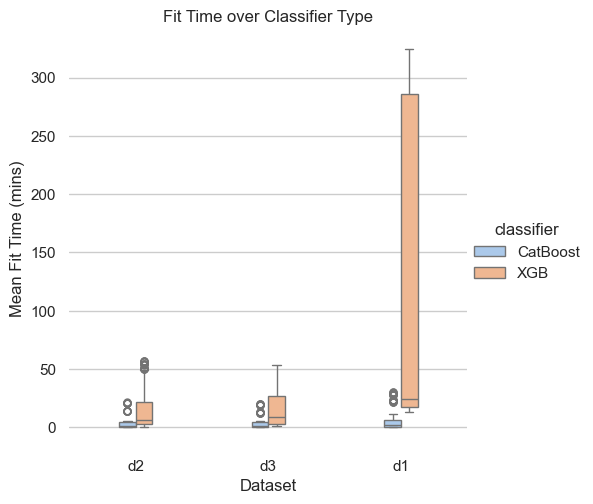

In [62]:
sns.set_theme(style='ticks', palette='pastel')
sns.set_style('whitegrid')

ax = sns.catplot(
    data=all_s_ftm,
    x='Dataset',
    y='fit_time_mean',
    kind='box',
    hue='classifier',
    width=0.25
);
sns.despine(offset=0, bottom=True, left=True)

plt.xlabel('Dataset');
plt.ylabel('Mean Fit Time (mins)');
plt.title('Fit Time over Classifier Type')

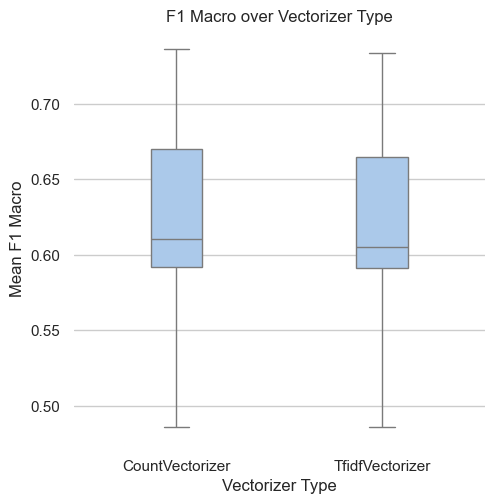

In [54]:
sns.set_theme(style='ticks', palette='pastel')
sns.set_style('whitegrid')

sns.catplot(data=all_s_mcr, x='vectorizer', y='f1_macro_mean', kind='box', width=0.25);

plt.xlabel('Vectorizer Type');
plt.ylabel('Mean F1 Macro');
plt.title('F1 Macro over Vectorizer Type')

sns.despine(offset=0, bottom=True, left=True)

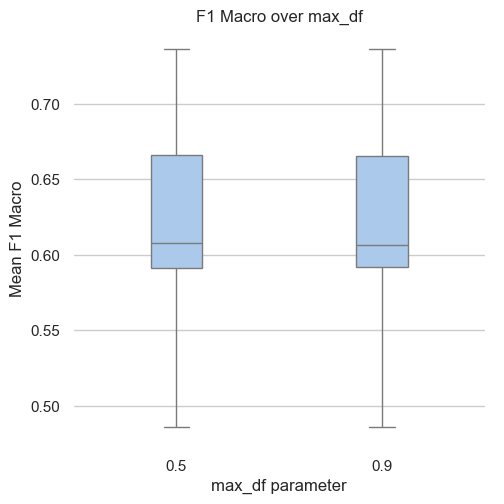

In [57]:
sns.catplot(data=all_s_mcr, x='max_df', y='f1_macro_mean', kind='box', width=0.25);

plt.xlabel('max_df parameter');
plt.ylabel('Mean F1 Macro');
plt.title('F1 Macro over max_df')

sns.despine(offset=0, bottom=True, left=True)

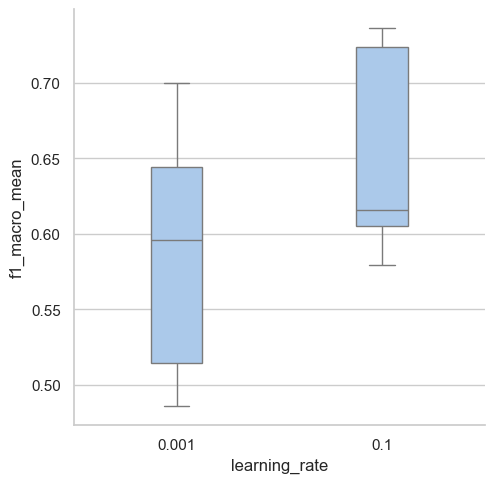

In [51]:
sns.catplot(data=all_s_mcr, x='learning_rate', y='f1_macro_mean', kind='box', width=0.25);